<a href="https://colab.research.google.com/github/arnelkovacevic/ml-product-reviews-project/blob/main/product_reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML PROJECT WITH DATASET FEEDBACK


In [58]:
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/arnelkovacevic/ml-product-reviews-project/main/data/product_reviews_full.csv"

df = pd.read_csv(url)

print("Number of rows:", len(df))
print("First 5 rows:")
print(df.head())

Number of rows: 171380
First 5 rows:
                            review_uuid  \
0  31b07b9a-4567-4db1-81f6-1bcef33b3e7b   
1  1cb2b4b5-9805-4c2d-9393-6b1382cb7c53   
2  f64165f0-29a2-4cfb-8b15-13c0c893e54d   
3  e442e083-a343-4052-b015-41e531e52d3e   
4  f4abefb8-22f0-4672-af73-2aa2954b24e0   

                                        product_name product_price  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   

      review_title                                        review_text  \
0           Super!  great cooler excellent air flow and for this p...   
1          Awesome              best budget 2 fit cooler nice cooling   
2             Fair  the quality is good but the power of air is 

Ucitavanje detalja iz dataseta

In [59]:

# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
display(df.head())

# Show column data types and non-null counts
print("\nDataset info:")
df.info()

Dataset shape (rows, columns): (171380, 6)

First 5 rows:


,review_uuid,product_name,product_price,review_title,review_text,sentiment
0,31b07b9a-4567-4db1-81f6-1bcef33b3e7b,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Super!,great cooler excellent air flow and for this p...,positive
1,1cb2b4b5-9805-4c2d-9393-6b1382cb7c53,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Awesome,best budget 2 fit cooler nice cooling,positive
2,f64165f0-29a2-4cfb-8b15-13c0c893e54d,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,the quality is good but the power of air is de...,positive
3,e442e083-a343-4052-b015-41e531e52d3e,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Useless product,very bad product its a only a fan,negative
4,f4abefb8-22f0-4672-af73-2aa2954b24e0,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,ok ok product,Neutral



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   review_uuid    171380 non-null  object
 1   product_name   171380 non-null  object
 2   product_price  170954 non-null  object
 3   review_title   171379 non-null  object
 4   review_text    171379 non-null  object
 5   sentiment      166369 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


In [60]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
review_uuid         0
product_name        0
product_price     426
review_title        1
review_text         1
sentiment        5011
dtype: int64


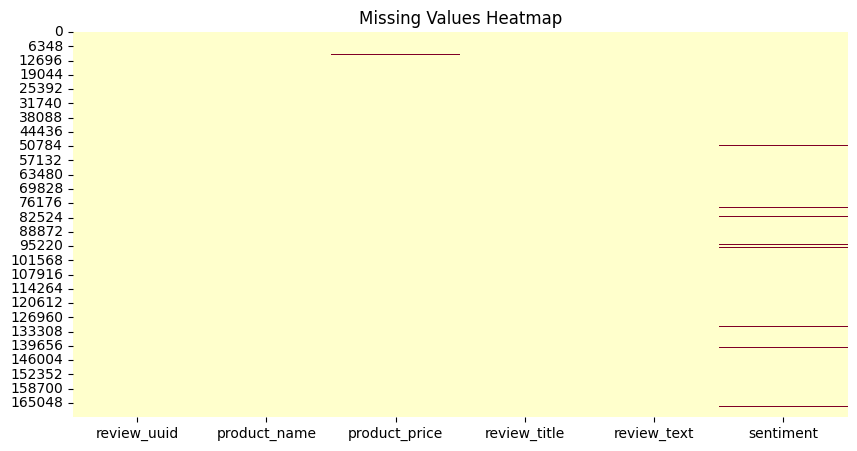

In [61]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

In [62]:
# Count occurrences of each sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Print counts
print("Sentiment distribution (counts):")
print(sentiment_counts)

Sentiment distribution (counts):
sentiment
positive    85537
negative    32369
Positive    22361
Negative    12392
neutral     10508
Neutral      3202
Name: count, dtype: int64


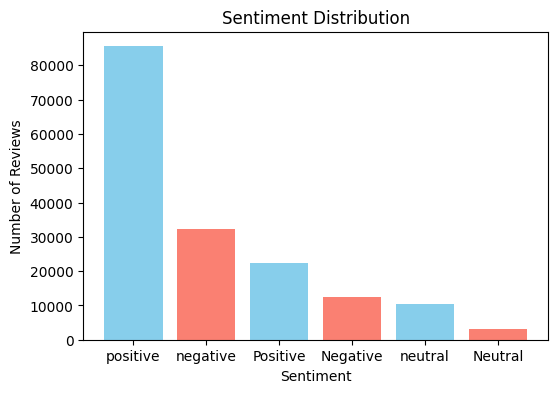

In [63]:
# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['skyblue', 'salmon'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

In [64]:
# 1. Check the data type of the 'product_price' column
print("Data type of product_price column:", df['product_price'].dtype)

# 2. Display the first 10 values from the column
print("\nFirst 10 values in product_price column:")
print(df['product_price'].head(10))

# 3. Show the 20 most frequent values in the column
print("\nTop 20 most frequent values in product_price column:")
print(df['product_price'].value_counts().head(20))

# 4. Check for known non-numeric text values
problematic_values = ['Free', 'Not Available', 'N/A', 'None', '-', 'free', 'unknown', 'Unavailable']
# Identify rows containing these specific non-numeric values
mask_problematic = df['product_price'].astype(str).str.strip().isin(problematic_values)
df_problematic = df[mask_problematic]
print(f"\nFound {len(df_problematic)} rows with problematic textual values:")
display(df_problematic[['product_price']].drop_duplicates())

# 5. Find and display some of the non-numeric values
price_clean = df['product_price'].astype(str).str.strip()
price_numeric = pd.to_numeric(price_clean, errors='coerce')

invalid_prices = df[price_numeric.isna()]
print("Number of non-numeric prices:", len(invalid_prices))
display(invalid_prices[['product_price']].drop_duplicates().head(20))

Data type of product_price column: object

First 10 values in product_price column:
0    48.18
1    48.18
2    48.18
3    48.18
4    48.18
5    48.18
6    48.18
7    48.18
8    48.18
9    48.18
Name: product_price, dtype: object

Top 20 most frequent values in product_price column:
product_price
2.63        4483
5.41        2648
$5.41       2577
19.27       2575
$2.63       2499
42.16       2242
168.66      2175
8.42        2103
6.01        1857
373.48      1824
3.6         1778
18.06       1710
$19.27      1671
$3.60       1608
96.37       1496
$168.66     1461
3.0         1395
$6.01       1359
3.24        1333
2.4         1321
Name: count, dtype: int64

Found 0 rows with problematic textual values:


,product_price


Number of non-numeric prices: 68858


,product_price
22,NaN
34279,$6.86
34512,$2.76
34553,$6.95
35245,$4.35
36212,$19.27
36613,$21.67
36622,$7.22
36753,$9.63
36766,$7.82


## CISCENJE PODATAKA


In [65]:
# Drop all rows with missing values
df = df.dropna()

# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (165960, 6)
Missing values per column:
review_uuid      0
product_name     0
product_price    0
review_title     0
review_text      0
sentiment        0
dtype: int64


## Parsing the prodtuc_price column

In [66]:
# Step 1: Convert to string and remove the 'USD' prefix and any leading/trailing spaces
df['product_price_cleaned'] = (
    df['product_price']
    .astype(str)
    .str.replace(r'$', '', regex=True)    # Remove '$'
    .str.replace(r'[^\d.]', '', regex=True) # Remove all non-numeric characters except the dot
    .str.strip()
)

# Step 2: Convert cleaned string to float
df['product_price'] = pd.to_numeric(df['product_price_cleaned'], errors='coerce')



# Step 3: Drop the temporary column
df = df.drop(columns=['product_price_cleaned'])

# Step 4: Drop any rows where conversion failed (still NaN)
df = df.dropna(subset=['product_price'])

# Step 5: Confirm result
print("Column type after parsing:", df['product_price'].dtype)
print("\nPrice summary:")
print(df['product_price'].describe())



Column type after parsing: float64

Price summary:
count    165960.000000
mean         65.786896
std         135.944167
min           0.180000
25%           4.190000
50%          14.450000
75%          66.250000
max        1566.140000
Name: product_price, dtype: float64


## Remove column uuid, product_name

In [67]:
# Drop columns that are not useful for modeling
df = df.drop(columns=['review_uuid', 'product_name'])

# Preview remaining columns
print("Remaining columns:")
print(df.columns.tolist())

Remaining columns:
['product_price', 'review_title', 'review_text', 'sentiment']


Price summary by sentiment:
             count       mean         std   min   25%    50%    75%      max
sentiment                                                                   
Negative   12369.0  52.228361  100.417535  0.71  3.60  20.47  52.96  1048.07
Neutral     3191.0  56.500038  108.327270  0.71  3.24  12.04  60.12  1048.07
Positive   22305.0  70.656064  149.220264  0.71  4.19  14.08  66.25  1048.07
negative   32294.0  62.499533  116.414719  0.71  4.39  16.25  66.25  1566.14
neutral    10487.0  55.237890  107.282157  0.71  3.42   9.63  59.02  1204.70
positive   85314.0  69.368051  147.028727  0.18  4.20  14.08  66.25  1048.07


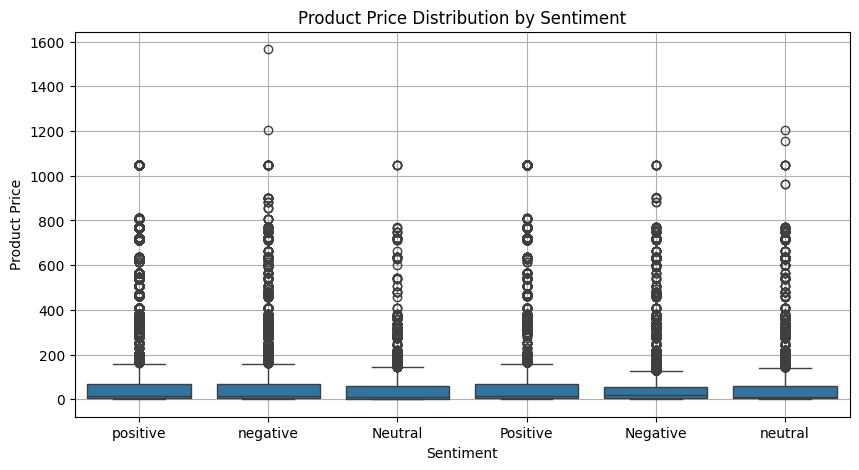

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show summary statistics grouped by sentiment
print("Price summary by sentiment:")
print(df.groupby('sentiment', observed=False)['product_price'].describe())

# Boxplot of prices by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment', y='product_price')
plt.title("Product Price Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Product Price")
plt.grid(True)
plt.show()

Review length summary:
count    165960.000000
mean         48.378435
std          76.611087
min           1.000000
25%           9.000000
50%          19.000000
75%          50.000000
max         523.000000
Name: review_length, dtype: float64
Review length statistics by sentiment:
             count       mean        std  min   25%   50%   75%    max
sentiment                                                             
Negative   12369.0  60.013744  75.593599  2.0  16.0  32.0  72.0  523.0
Neutral     3191.0  40.847383  63.927831  1.0   7.0  20.0  46.0  500.0
Positive   22305.0  44.605335  77.651182  1.0   8.0  16.0  41.0  497.0
negative   32294.0  61.240416  79.414896  1.0  16.0  32.0  70.0  497.0
neutral    10487.0  41.591876  64.945545  1.0   7.0  19.0  47.0  500.0
positive   85314.0  43.925229  76.423486  1.0   8.0  15.0  41.0  494.0


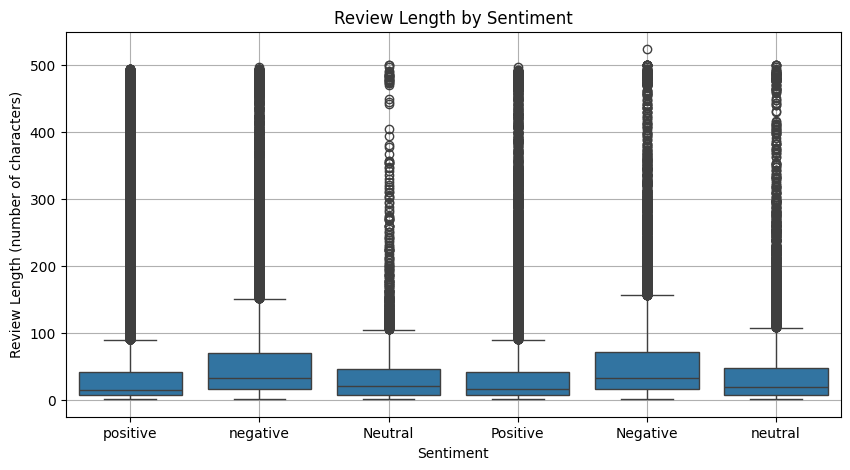

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create new column with length of each review_text
df['review_length'] = df['review_text'].astype(str).str.len()

# Show basic stats
print("Review length summary:")
print(df['review_length'].describe())

# Group by sentiment and describe review length
print("Review length statistics by sentiment:")
print(df.groupby('sentiment', observed=False)['review_length'].describe())

# Visualize distribution of review length by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment', y='review_length')
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (number of characters)")
plt.grid(True)
plt.show()